<a href="https://colab.research.google.com/github/MadhurAwasthi/Play-store-EDA/blob/main/Play_Store_App_Review_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> The Play Store apps data has enormous potential to drive app-making businesses to success. Actionable insights can be drawn for developers to work on and capture the Android market. </b>

## <b> Each app (row) has values for catergory, rating, size, and more. Another dataset contains customer reviews of the android apps.</b>

## <b> Explore and analyze the data to discover key factors responsible for app engagement and success. </b>

##**INTRODUCTION :**
This project is all about Exploratory Data Analysis of play store apps data through which we are going to get insight of data and discover key components,factors responsible for the engagement and success of an application.This analysed data could be used by investors,developers to develop engaging and profitable apps .


## **The whole project consists of following steps**

*  Importing the data
*  Exploring the data
*  Cleaning the data
*  Merging the data
*  Analysis and Visualization
*  Conclusion

**Imports**: Importing the required libraries 

In [5]:
#imports Some importance libries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import ast
%matplotlib inline

# Importing the data

In [6]:
# mounting google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
# Loading the dataset as a pandas data frame.
playstore_df = pd.read_csv('/content/drive/MyDrive/CAPSTON PROJECT EDA/CAPSTON PROJECT EDA/Play Store Data.csv')
review_df=pd.read_csv('/content/drive/MyDrive/CAPSTON PROJECT EDA/CAPSTON PROJECT EDA/User Reviews.csv')

##**Exploring the data**  : In this section we will explore the data and take a glance of the data 

**Exploring 1st data frame (Playstore_df)**

In [8]:
# look at shape of dataframe
playstore_df.shape

(10841, 13)

It has 10841 rows and 13 columns

In [9]:
# look at the first first few records in the apps dataframe
playstore_df.head(10)


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5.6M,"50,000+",Free,0,Everyone,Art & Design,"March 26, 2017",1.0,2.3 and up
6,Smoke Effect Photo Maker - Smoke Editor,ART_AND_DESIGN,3.8,178,19M,"50,000+",Free,0,Everyone,Art & Design,"April 26, 2018",1.1,4.0.3 and up
7,Infinite Painter,ART_AND_DESIGN,4.1,36815,29M,"1,000,000+",Free,0,Everyone,Art & Design,"June 14, 2018",6.1.61.1,4.2 and up
8,Garden Coloring Book,ART_AND_DESIGN,4.4,13791,33M,"1,000,000+",Free,0,Everyone,Art & Design,"September 20, 2017",2.9.2,3.0 and up
9,Kids Paint Free - Drawing Fun,ART_AND_DESIGN,4.7,121,3.1M,"10,000+",Free,0,Everyone,Art & Design;Creativity,"July 3, 2018",2.8,4.0.3 and up


In [10]:
# last few records
playstore_df.tail()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device
10840,iHoroscope - 2018 Daily Horoscope & Astrology,LIFESTYLE,4.5,398307,19M,"10,000,000+",Free,0,Everyone,Lifestyle,"July 25, 2018",Varies with device,Varies with device


In [11]:
# look at the info of the dataframe
playstore_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


By looking at the info of (playstore_df) we found some of the values are null and most columns datatype is object

#**Description of App Dataset columns**

1.    App : The name of the app
2.    Category : The category of the app
3.    Rating : The rating of the app in the Play Store
4.    Reviews : The number of reviews of the app
5.    Size : The size of the app
6.    Install : The number of installs of the app
7.    Type : The type of the app (Free/Paid)
8.    price: The price of the app (0 if it is Free)
9.    Content Rating :The appropiate target audience of the app
10.   Genres: The genre of the app
11.   Last Updated : The date when the app was last updated
12.   Current Ver : The current version of the app
13.   Android Ver : The minimum Android version required to run the app

**Let us explore 2nd dataframe (review_df)**

In [12]:
# find shape of dataframe 
review_df.shape

(64295, 5)

It has 64295 rows and 5 columns

In [13]:
review_df.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


In [14]:
review_df.tail()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
64290,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64291,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64292,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64293,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64294,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN


In [15]:
review_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64295 entries, 0 to 64294
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     64295 non-null  object 
 1   Translated_Review       37427 non-null  object 
 2   Sentiment               37432 non-null  object 
 3   Sentiment_Polarity      37432 non-null  float64
 4   Sentiment_Subjectivity  37432 non-null  float64
dtypes: float64(2), object(3)
memory usage: 2.5+ MB


By looking at review dataframe info we found it has many null values and only 3 columns namely(Sentiment,Sentiment_polarity,Sentiment_subjectivity) having same
number of non null values 

# **Description of reviews dataframe columns**
App : The name of the app

---


Transleted_Review: Given review by users

---


Sentiment: The sentiment of user regarding the app

---


Sentiment_Polarity : numerical rating of sentiment[-1 to 1]

---
Sentiment_subjectivity :personal opinion, emotion or judgment[0 to 1]


# **Data Cleaning and data Preparation**:In this section we will remove null values,redundant and unnecessary data which could hinder the data analysis process and prepare data ready for analysing.

**cleaning 1st data frame(playstore_df)**

In [16]:
# finding the duplicates in playstore_df
playstore_df.duplicated(keep='last').sum()

483

In [17]:
#there are 483 duplicate rows so let us remove them
playstore_df.drop_duplicates(keep='last',inplace=True)

In [18]:
# let us us see if there are more duplicates
playstore_df.duplicated(subset=['App','Category','Rating']).sum()

# 680 rows having same app and rating

603

In [19]:
# now let us remove these duplicates
playstore_df.drop_duplicates(subset=['App','Rating', 'Category'],keep='last',inplace=True)

In [20]:
# we have seen that "Rating" column consists of huge amount of null values let us check it further
playstore_df[playstore_df['Rating'].isna()].count()

App               1465
Category          1465
Rating               0
Reviews           1465
Size              1465
Installs          1465
Type              1464
Price             1465
Content Rating    1465
Genres            1465
Last Updated      1465
Current Ver       1461
Android Ver       1465
dtype: int64

total 1464 rows having null 'Rating'

In [21]:
# let us see it
playstore_df[playstore_df['Rating'].isna()].head(50)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
23,Mcqueen Coloring pages,ART_AND_DESIGN,NaN,61,7.0M,"100,000+",Free,0,Everyone,Art & Design;Action & Adventure,"March 7, 2018",1.0.0,4.1 and up
113,Wrinkles and rejuvenation,BEAUTY,NaN,182,5.7M,"100,000+",Free,0,Everyone 10+,Beauty,"September 20, 2017",8.0,3.0 and up
123,Manicure - nail design,BEAUTY,NaN,119,3.7M,"50,000+",Free,0,Everyone,Beauty,"July 23, 2018",1.3,4.1 and up
126,Skin Care and Natural Beauty,BEAUTY,NaN,654,7.4M,"100,000+",Free,0,Teen,Beauty,"July 17, 2018",1.15,4.1 and up
129,"Secrets of beauty, youth and health",BEAUTY,NaN,77,2.9M,"10,000+",Free,0,Mature 17+,Beauty,"August 8, 2017",2.0,2.3 and up
130,Recipes and tips for losing weight,BEAUTY,NaN,35,3.1M,"10,000+",Free,0,Everyone 10+,Beauty,"December 11, 2017",2.0,3.0 and up
134,"Lady adviser (beauty, health)",BEAUTY,NaN,30,9.9M,"10,000+",Free,0,Mature 17+,Beauty,"January 24, 2018",3.0,3.0 and up
163,Anonymous caller detection,BOOKS_AND_REFERENCE,NaN,161,2.7M,"10,000+",Free,0,Everyone,Books & Reference,"July 13, 2018",1.0,2.3 and up
180,SH-02J Owner's Manual (Android 8.0),BOOKS_AND_REFERENCE,NaN,2,7.2M,"50,000+",Free,0,Everyone,Books & Reference,"June 15, 2018",3.0,6.0 and up
185,URBANO V 02 instruction manual,BOOKS_AND_REFERENCE,NaN,114,7.3M,"100,000+",Free,0,Everyone,Books & Reference,"August 7, 2015",1.1,5.1 and up


In rows where rating is null reviews and installs are also less.

In [22]:
# let us remove the rows where rating is null
playstore_df.drop(playstore_df[playstore_df['Rating'].isna()].index, inplace=True)

Let us remove column which are of no use

In [23]:
playstore_df['Current Ver'].value_counts()

Varies with device    1030
1.0                    449
1.1                    191
1.2                    125
2.0                    117
                      ... 
1.1.3.2                  1
15.1.2                   1
3.0.231.18141            1
4.94.19                  1
0.3.4                    1
Name: Current Ver, Length: 2632, dtype: int64

In [24]:
# Removing column 'Android Ver' and 'Current Ver'
playstore_df.drop(['Android Ver','Current Ver'],axis=1,inplace=True)

In [25]:
playstore_df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018"
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018"
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018"
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018"
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018"


Now lets see if there are any further null values 

In [26]:
playstore_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8290 entries, 0 to 10840
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             8290 non-null   object 
 1   Category        8290 non-null   object 
 2   Rating          8290 non-null   float64
 3   Reviews         8290 non-null   object 
 4   Size            8290 non-null   object 
 5   Installs        8290 non-null   object 
 6   Type            8290 non-null   object 
 7   Price           8290 non-null   object 
 8   Content Rating  8289 non-null   object 
 9   Genres          8290 non-null   object 
 10  Last Updated    8290 non-null   object 
dtypes: float64(1), object(10)
memory usage: 777.2+ KB


Only 'Content Rating' has 1 null value.
All further null values are removed

In [27]:
# let us see this null values
# see rows having 'Content Rating' null
playstore_df[playstore_df['Content Rating'].isna()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19


In [28]:
# The above row is having mismatch values so should be removed
# lets remove it
playstore_df.drop(playstore_df[playstore_df['Content Rating'].isna()].index, inplace=True)

Now let us convert column values to analyzable format

In [29]:
# column 'Reviews' is object type lets convert to int
playstore_df['Reviews']=playstore_df['Reviews'].astype(int)

In [30]:
# column 'Last Updated' is object type lets convert to date type
playstore_df['Last Updated']=playstore_df['Last Updated'].astype('datetime64[s]')

In [31]:
# column size
playstore_df['Size'].value_counts().tail(30)

585k    1
982k    1
782k    1
459k    1
61k     1
412k    1
283k    1
655k    1
714k    1
93k     1
872k    1
121k    1
322k    1
976k    1
206k    1
954k    1
444k    1
717k    1
210k    1
609k    1
308k    1
306k    1
175k    1
350k    1
383k    1
454k    1
812k    1
442k    1
842k    1
619k    1
Name: Size, dtype: int64

In [32]:
# lets remove M and K and convert all data to mb
playstore_df['Size']=playstore_df['Size'].apply(lambda x:float(str(x).replace('M','')) if 'M' in str(x) else x )
playstore_df['Size']=playstore_df['Size'].apply(lambda x:float(str(x).replace('k',''))/1000 if 'k' in str(x) else x ) # div by 1000 to conv kb to mb

In [33]:
# column Price
playstore_df['Price'].value_counts().tail(30)

$2.56      1
$3.28      1
$1.97      1
$2.90      1
$2.95      1
$4.60      1
$1.75      1
$400.00    1
$389.99    1
$18.99     1
$1.50      1
$15.99     1
$79.99     1
$9.00      1
$33.99     1
$39.99     1
$3.88      1
$3.02      1
$1.76      1
$4.84      1
$4.77      1
$1.61      1
$2.50      1
$1.59      1
$6.49      1
$1.29      1
$299.99    1
$379.99    1
$37.99     1
$1.20      1
Name: Price, dtype: int64

In [34]:
#removing '$' from price
playstore_df['Price']=playstore_df['Price'].apply(lambda x:float(str(x).replace('$','')) if '$' in str(x) else x )
playstore_df['Price']=playstore_df['Price'].astype(float)

While Analyzing the Dataset we can see that we do have some values which contains Varies with device intead of int let's see how many such values we do have.

In [35]:
playstore_df['Size'][playstore_df['Size']=='Varies with device'].count()

1193

After the analyzing Size columns in details we got to know that maximum applications of same categories have the approx same sizes so we can replace the NaN and varies with device values with the mean of Size according to category wise.

In [36]:
#Let's check how many apps we do have in each category
playstore_df.groupby('Category').count()['App']

Category
ART_AND_DESIGN           61
AUTO_AND_VEHICLES        73
BEAUTY                   42
BOOKS_AND_REFERENCE     169
BUSINESS                263
COMICS                   54
COMMUNICATION           257
DATING                  134
EDUCATION               118
ENTERTAINMENT           102
EVENTS                   45
FAMILY                 1684
FINANCE                 302
FOOD_AND_DRINK           95
GAME                    914
HEALTH_AND_FITNESS      244
HOUSE_AND_HOME           62
LIBRARIES_AND_DEMO       64
LIFESTYLE               301
MAPS_AND_NAVIGATION     118
MEDICAL                 293
NEWS_AND_MAGAZINES      204
PARENTING                50
PERSONALIZATION         298
PHOTOGRAPHY             265
PRODUCTIVITY            301
SHOPPING                181
SOCIAL                  203
SPORTS                  262
TOOLS                   721
TRAVEL_AND_LOCAL        187
VIDEO_PLAYERS           150
WEATHER                  72
Name: App, dtype: int64

In [37]:
# let's convert Varies with device to NaN values so that we can easily replace them
playstore_df['Size'] = playstore_df.Size.replace('Varies with device' , np.NaN)
# Let's calculate the mean values according to categories
playstore_df.Size = playstore_df.groupby('Category')['Size'].apply(lambda x: x.fillna(x.mean()))

In [38]:
#Let's see now if we have any null values in Size
playstore_df['Size'].isna().sum()

0

In [39]:
playstore_df.head(10)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,"10,000+",Free,0.0,Everyone,Art & Design,2018-01-07
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,"500,000+",Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,"5,000,000+",Free,0.0,Everyone,Art & Design,2018-08-01
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,"50,000,000+",Free,0.0,Teen,Art & Design,2018-06-08
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,"100,000+",Free,0.0,Everyone,Art & Design;Creativity,2018-06-20
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5.6,"50,000+",Free,0.0,Everyone,Art & Design,2017-03-26
6,Smoke Effect Photo Maker - Smoke Editor,ART_AND_DESIGN,3.8,178,19.0,"50,000+",Free,0.0,Everyone,Art & Design,2018-04-26
7,Infinite Painter,ART_AND_DESIGN,4.1,36815,29.0,"1,000,000+",Free,0.0,Everyone,Art & Design,2018-06-14
8,Garden Coloring Book,ART_AND_DESIGN,4.4,13791,33.0,"1,000,000+",Free,0.0,Everyone,Art & Design,2017-09-20
9,Kids Paint Free - Drawing Fun,ART_AND_DESIGN,4.7,121,3.1,"10,000+",Free,0.0,Everyone,Art & Design;Creativity,2018-07-03


In [40]:
# Coloumn Installs 
playstore_df['Installs']
# It consists of ',' and '+' symbol 

0            10,000+
1           500,000+
2         5,000,000+
3        50,000,000+
4           100,000+
            ...     
10834           500+
10836         5,000+
10837           100+
10839         1,000+
10840    10,000,000+
Name: Installs, Length: 8289, dtype: object

In [41]:
#lets remove ',' and '+' symbol from Installs and convert it to int
playstore_df['Installs']=playstore_df['Installs'].apply(lambda x: str(x).replace('+','') if '+' in str(x) else x)
playstore_df['Installs']=playstore_df['Installs'].apply(lambda x: str(x).replace(',','') if ',' in str(x) else x)
playstore_df['Installs']=playstore_df['Installs'].astype(int)

In [42]:
# app column 
# converting apps to string
playstore_df['App']=playstore_df['App'].astype(str)

In [43]:
playstore_df['Installs'].value_counts() # diff no of installs in mb

1000000       1428
100000        1098
10000          988
10000000       963
1000           698
5000000        621
500000         509
50000          457
5000           425
100            303
50000000       211
100000000      204
500            199
10              69
50              56
500000000       27
1000000000      21
5                9
1                3
Name: Installs, dtype: int64

In [44]:
# now lets see how are dataframe looks
playstore_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8289 entries, 0 to 10840
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   App             8289 non-null   object        
 1   Category        8289 non-null   object        
 2   Rating          8289 non-null   float64       
 3   Reviews         8289 non-null   int64         
 4   Size            8289 non-null   float64       
 5   Installs        8289 non-null   int64         
 6   Type            8289 non-null   object        
 7   Price           8289 non-null   float64       
 8   Content Rating  8289 non-null   object        
 9   Genres          8289 non-null   object        
 10  Last Updated    8289 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(3), int64(2), object(5)
memory usage: 777.1+ KB


updated dataframe has 8213 rows and 11 columns

**Cleaning 2nd dataframe (review_df)**

In [45]:
# first see if there are any duplicates
review_df.duplicated(keep='last').sum()

33616

In [46]:
# we have seen while exploring this columns (Sentiment,Sentiment_polarity,Sentiment_subjectivity) have many null values lets remove them 
review_df.drop(review_df[review_df['Sentiment'].isna()].index, inplace=True)

In [47]:
review_df.info()
# so we have removed all the null values

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37432 entries, 0 to 64230
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     37432 non-null  object 
 1   Translated_Review       37427 non-null  object 
 2   Sentiment               37432 non-null  object 
 3   Sentiment_Polarity      37432 non-null  float64
 4   Sentiment_Subjectivity  37432 non-null  float64
dtypes: float64(2), object(3)
memory usage: 1.7+ MB


In [48]:
#Lets check how much percentage of Postive Sentiments we have in data set.
df_review=review_df.groupby(['Sentiment']).count()

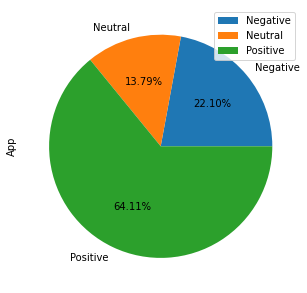

In [49]:
#Plot the percentage of sentiments on the pie chart in entire data set
df_review.plot.pie(y='App', figsize=(5,6),autopct='%1.2f%%')

Now we have to check average ratings of the categories so that we can see which category is have more engagement.

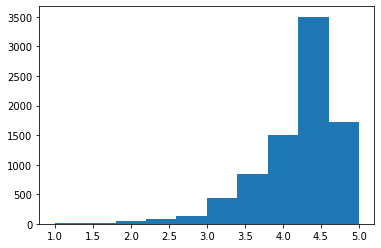

In [50]:
playstore_df['Rating'].hist(grid=False)

After Analyzing the above graph we can see that maximum applications we do have with ratings more then 4.0, rating is between 4.0 to 5.0.

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


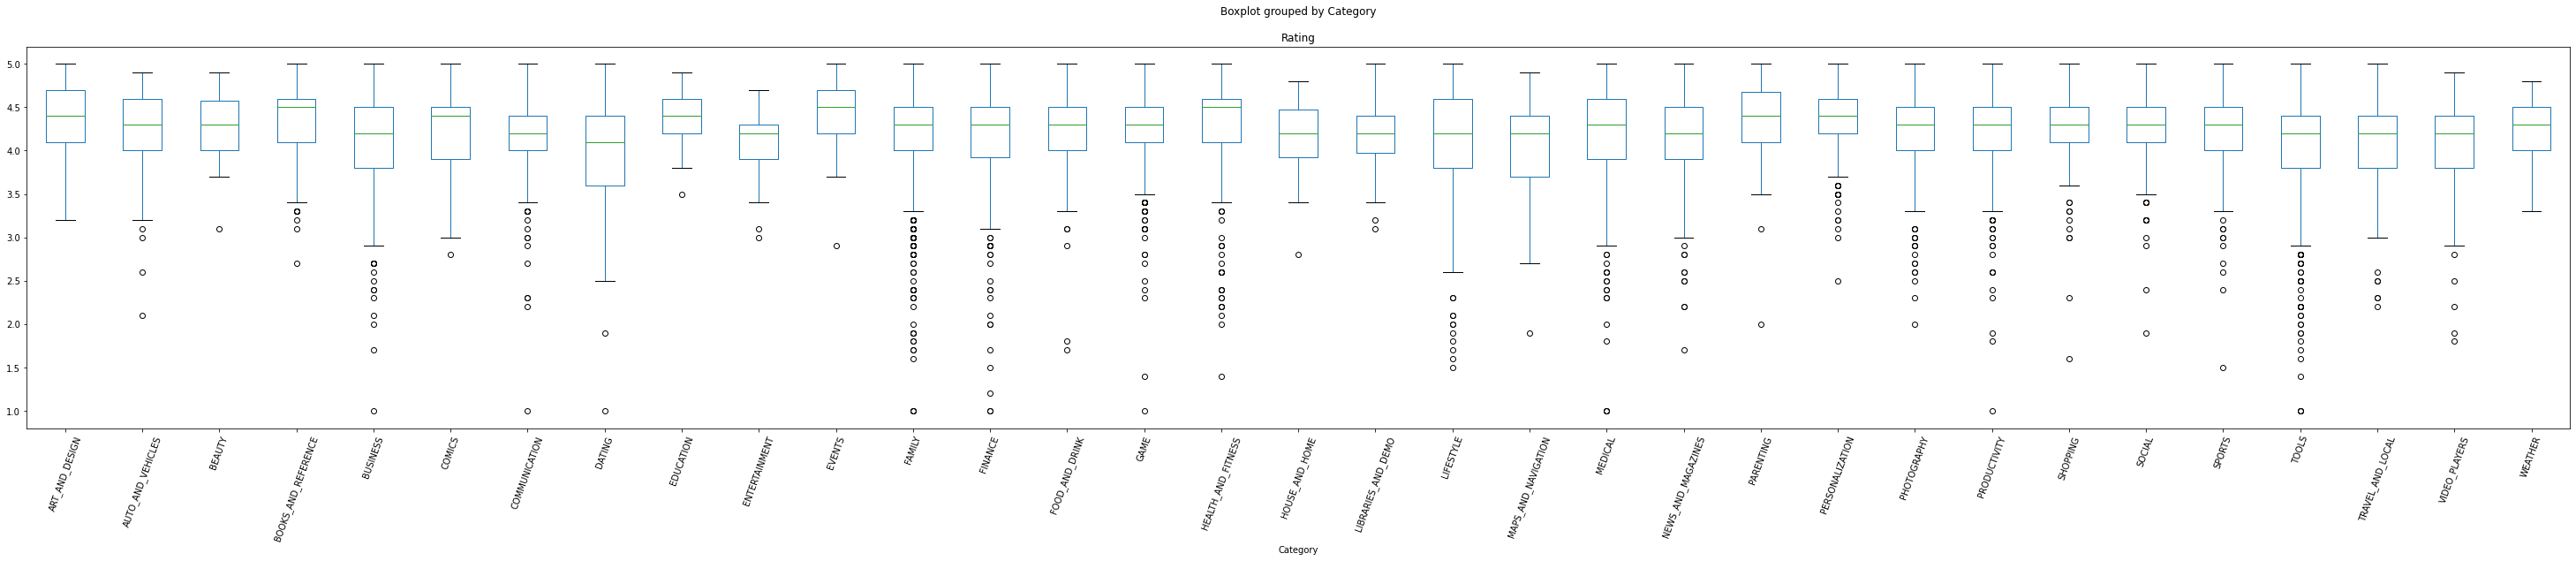

In [51]:
playstore_df.boxplot(by ='Category', column =['Rating'], grid = False, figsize=(50,8),rot=70)

In above data set we can see that maximum Ratings we have with above 4.0 although we do have some outliers with rating below 4.0.

Now let’s see the top installed apps in the playstore.


In [52]:
#Find unique values in the installs 
playstore_df.Installs.unique()

array([     10000,     500000,    5000000,   50000000,     100000,
            50000,    1000000,   10000000,       5000, 1000000000,
        100000000,       1000,        100,        500,         10,
        500000000,          5,         50,          1])

### In this dataset there are many such apps ,which have low installs (less then and equal to 100) and good rating (like: 5) . due to this outliers the data visualization is not clear ,so we have taken the decision that we will drop these outliers

In [53]:
#To know no of Installs less than 100
playstore_df[playstore_df['Installs'] <=100]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated
481,AMBW Dating App: Asian Men Black Women Interra...,DATING,3.5,2,17.0,100,Paid,7.99,Mature 17+,Dating,2017-01-21
615,Awake Dating,DATING,5.0,2,70.0,100,Free,0.00,Mature 17+,Dating,2018-07-24
619,Random Chat App with Strangers,DATING,3.0,2,16.0,100,Free,0.00,Mature 17+,Dating,2018-07-17
625,House party - live chat,DATING,1.0,1,9.2,10,Free,0.00,Mature 17+,Dating,2018-07-31
636,Girls Live Talk - Free Text and Video Chat,DATING,5.0,6,5.0,100,Free,0.00,Mature 17+,Dating,2018-08-01
...,...,...,...,...,...,...,...,...,...,...,...
10721,Mad Dash Fo' Cash,GAME,5.0,14,16.0,100,Free,0.00,Everyone,Arcade,2017-06-19
10776,Monster Ride Pro,GAME,5.0,1,24.0,10,Free,0.00,Everyone,Racing,2018-03-05
10805,Scoreboard FR,LIFESTYLE,4.3,3,15.0,100,Free,0.00,Everyone,Lifestyle,2018-08-07
10810,Fr Lupupa Sermons,BUSINESS,4.8,19,21.0,100,Free,0.00,Everyone,Business,2018-06-12


In [54]:
#  drop all rows that are less than and equal to 100
playstore_df.drop(playstore_df[playstore_df.Installs <= 100].index, inplace = True)

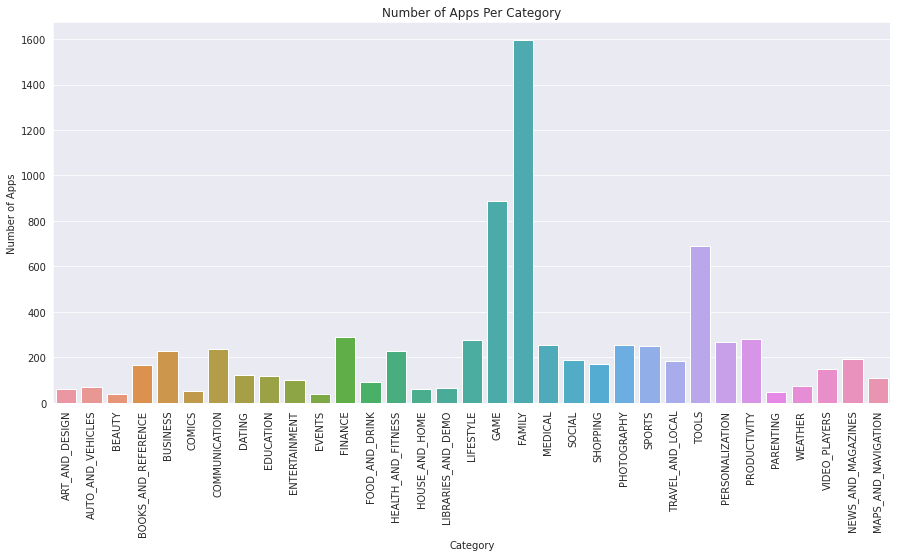

In [55]:
# get the number of apps for each category
sns.set_style('darkgrid')
plt.figure(figsize=(15, 7))
sns.countplot(x='Category', data=playstore_df)
plt.title('Number of Apps Per Category')
plt.xticks(rotation=90)
plt.ylabel('Number of Apps')
plt.show()

From this ploting we know that most of the app in play store by categories are form 'Family' , 'Game' and 'Tools'

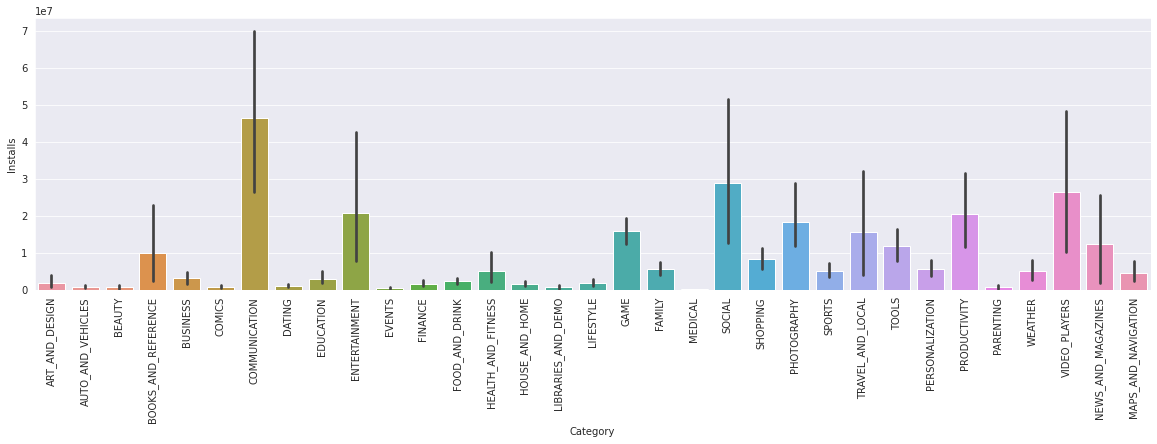

In [56]:
fig, ax = plt.subplots(figsize=(20,5))
sns.barplot(x='Category', y='Installs', data=playstore_df,ax=ax);
plt.xticks(rotation=90);

From here it is seen that applications of the category 'BOOKS_AND_REFERENCE', 'COMMUNICATIONS', 'ENTERTAINMENT','GAME', 'FAMILY', 'SOCIAL', 'PHOTOGRAPHY', 'TRAVEL_AND_LOCAL', 'TOOL', 'PRODUCTIVITY', 'VIDEOO_PLAYERS' and 'NEWS_AND_MAGAZINES' are installed the most(1billion+ times). Alongwith these, 'HEALTH_AND_FITNESS' is also installed approximately 4.5milliion+ times.

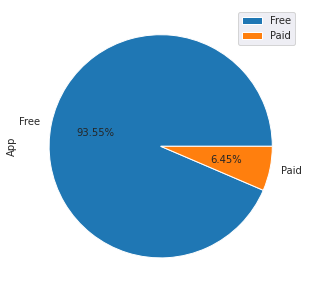

In [57]:
#Lets check the percentage of free and paid apps in Dataset.
type_pie=playstore_df.groupby('Type').count()
type_pie.plot.pie(y='App', figsize=(5,6),autopct='%1.2f%%')

In above pie chart we can see, Free apps are installed more than paid apps.\

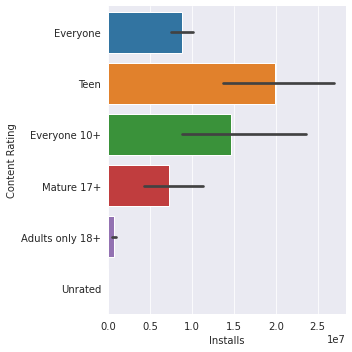

In [58]:
sns.catplot(y='Content Rating', x='Installs', data=playstore_df,kind='bar', orient='h');

Apps targeted at any age groups other than those labelled 'Adults only 18+' and 'Unrated' are installed. It can however be seen that apps labelled 'Teen' and 'Everyone 10+' are installed 30 million+ times.



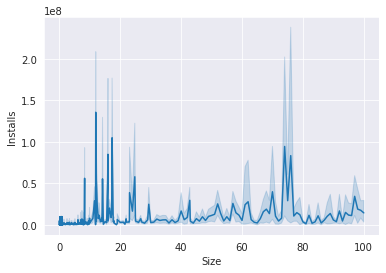

In [59]:
sns.lineplot(data = playstore_df, x='Size', y='Installs')

 From above chart, we can say that the applications whose sizes are from 15-20 having maximum number of installs.



**Now we will merge the dataframes**

In [60]:
# merging and storing in 'merged_df'
merged_df=playstore_df.merge(review_df,how='inner',left_on='App',right_on='App')

In [61]:
# let us see the shape
merged_df.shape

(38574, 15)

In [62]:
merged_df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,A kid's excessive ads. The types ads allowed a...,Negative,-0.250,1.000000
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,It bad >:(,Negative,-0.725,0.833333
2,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,like,Neutral,0.000,0.000000
3,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,I love colors inspyering,Positive,0.500,0.600000
4,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,I hate,Negative,-0.800,0.900000


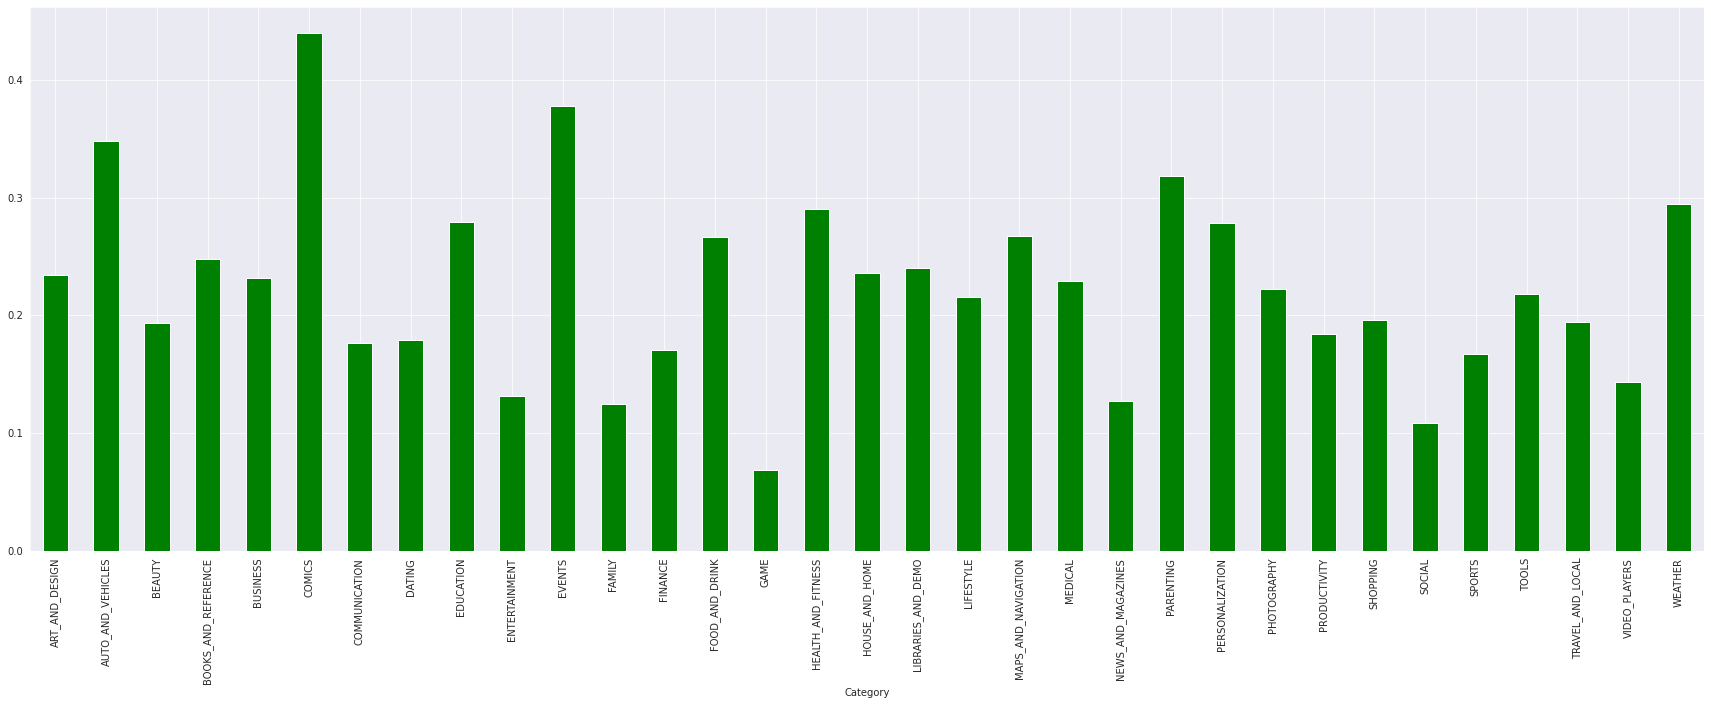

In [63]:
# mean of sentiment_polarity category wise
merged_df.groupby('Category')['Sentiment_Polarity'].mean().plot(kind='bar',color='green',figsize=(30,10))